# Ch 04: Concept 01

## Linear regression for classification (just for demonstrative purposes)

Import the usual libraries:

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's say we have numbers that we want to classify. They'll just be 1-dimensional values. Numbers close to 2 will be given the label [1]. and numbers close to 5 will be given the label [0], as designed here:

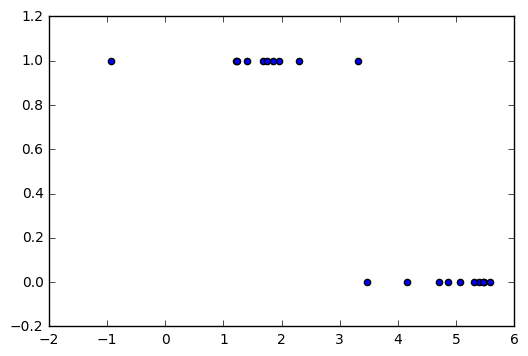

In [2]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

Define the hyper-parameters, placeholders, and variables:

In [3]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

w = tf.Variable([0., 0.], name="parameters")

Define the model:

In [4]:
def model(X, w):
    return tf.add(tf.mul(w[1], tf.pow(X, 1)),
                  tf.mul(w[0], tf.pow(X, 0)))

Given a model, define the cost function:

In [5]:
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y - y_model))

Set up the training op, and also introduce a couple ops to calculate some metrics, such as accuracy:

In [6]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

Prepare the session:

In [7]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

Running the training op multiple times on the input data:

In [8]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch % 10 == 0:
        print(epoch, current_cost)

(0, 8.979229)
(10, 7.4529796)
(20, 6.3303523)
(30, 5.4035659)
(40, 4.6384568)
(50, 4.0068192)
(60, 3.4853706)
(70, 3.0548873)
(80, 2.6995015)
(90, 2.4061127)
(100, 2.1639049)
(110, 1.9639498)
(120, 1.7988765)
(130, 1.6626003)
(140, 1.550097)
(150, 1.45722)
(160, 1.3805454)
(170, 1.3172462)
(180, 1.2649899)
(190, 1.2218493)
(200, 1.186235)
(210, 1.1568331)
(220, 1.1325605)
(230, 1.112522)
(240, 1.0959792)
(250, 1.0823224)
(260, 1.071048)
(270, 1.0617405)
(280, 1.0540565)
(290, 1.047713)
(300, 1.0424763)
(310, 1.0381529)
(320, 1.0345838)
(330, 1.0316374)
(340, 1.0292052)
(350, 1.0271971)
(360, 1.0255392)
(370, 1.0241704)
(380, 1.0230407)
(390, 1.0221081)
(400, 1.021338)
(410, 1.0207021)
(420, 1.0201774)
(430, 1.0197442)
(440, 1.0193863)
(450, 1.0190912)
(460, 1.0188475)
(470, 1.0186461)
(480, 1.0184799)
(490, 1.0183427)
(500, 1.0182296)
(510, 1.0181361)
(520, 1.0180588)
(530, 1.0179954)
(540, 1.0179425)
(550, 1.0178993)
(560, 1.0178634)
(570, 1.0178337)
(580, 1.0178094)
(590, 1.0177892)


Show some final metrics/results:

In [9]:
w_val = sess.run(w)
print('learned parameters', w_val)

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

sess.close()

('learned parameters', array([ 1.27021515, -0.23604654], dtype=float32))
('accuracy', 0.94999999)


Plot the learned function

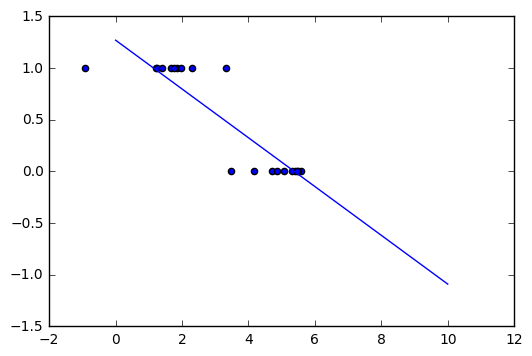

In [10]:
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()